In [97]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [98]:
path = r'C:\Users\marca\OneDrive\Documentos\6 semestre neuro\Neurociencias-2025-2\S03_datasets\iris\iris.csv'

In [99]:
dff = pd.read_csv(path)
dff.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [119]:
Y = dff.iloc[:,:4]
Y

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [121]:
dff['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

C:\Users\marca\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marca\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marca\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marca\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

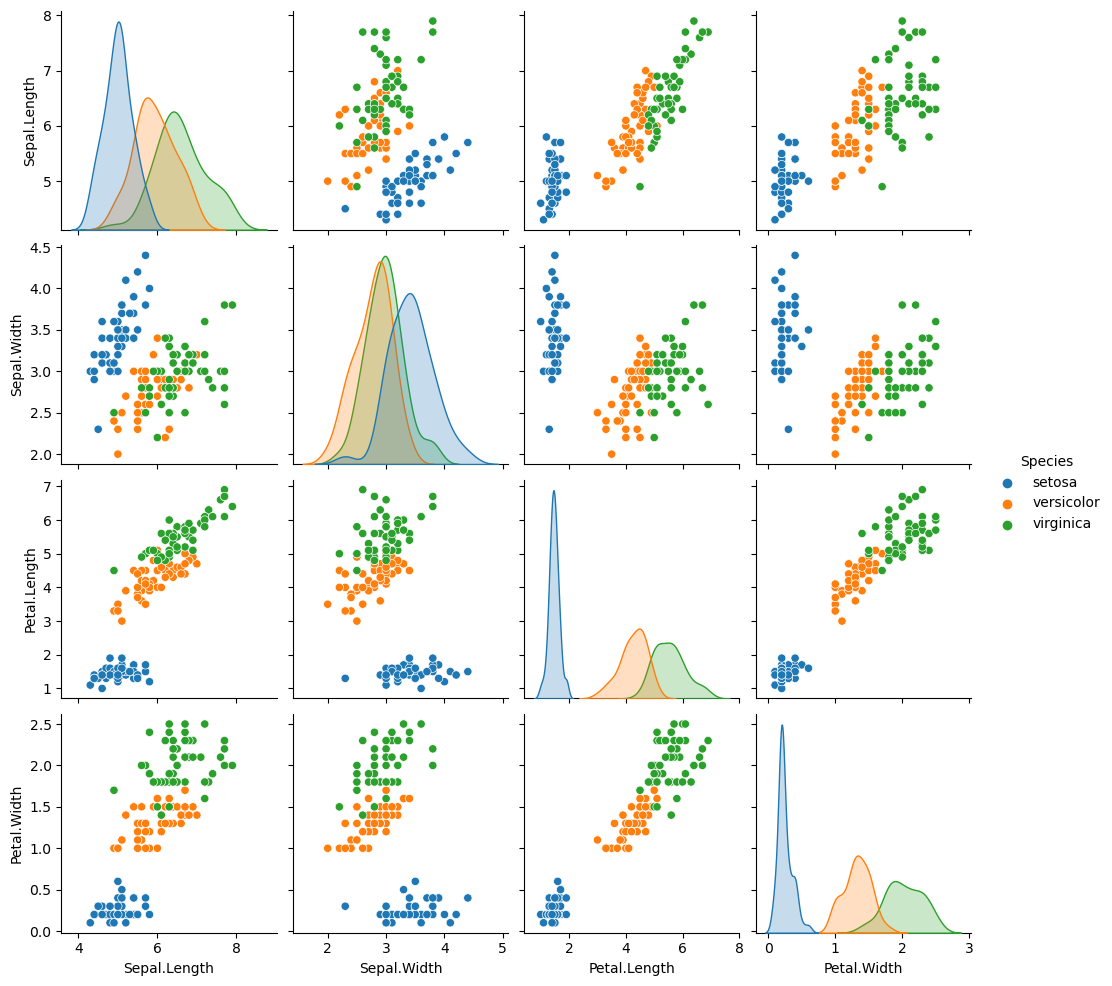

In [123]:
sns.pairplot(dff, hue="Species")

In [125]:
cov_matrixx = np.cov(Y.T)
cov_matrixx

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [127]:
eig_valss, eig_vecss = np.linalg.eig(cov_matrixx)
eig_valss, eig_vecss

(array([4.22824171, 0.24267075, 0.0782095 , 0.02383509]),
 array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
        [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
        [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
        [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]]))

In [129]:
total_summ = np.sum(eig_valss)

val_ev1_ = eig_valss[0]/total_summ*100
val_ev2_ = eig_valss[1]/total_summ*100
val_ev3_ = eig_valss[2]/total_summ*100
val_ev4_ = eig_valss[3]/total_summ*100
val_ev1_, val_ev2_, val_ev3_, val_ev4_

var_expp = [(i/total_summ)*100 for i in sorted(eig_valss, reverse=True)]
cum_var_expp = np.cumsum(var_expp)
cum_var_expp

# Los primeros tres componentes suman 99.47

array([ 92.46187232,  97.76852063,  99.47878161, 100.        ])

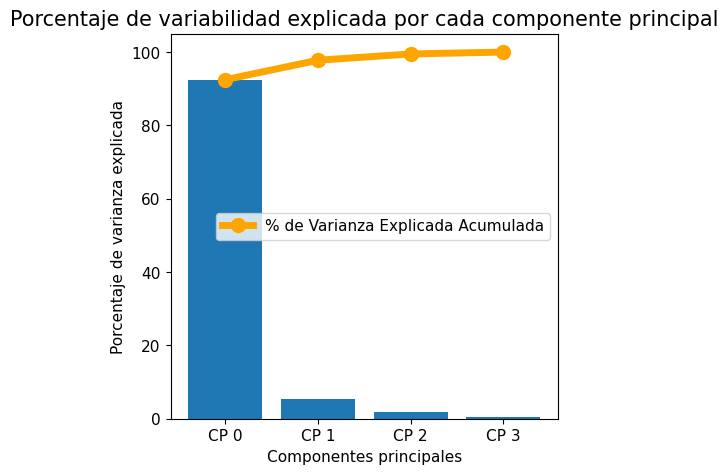

In [133]:
plt.figure(figsize=(5, 5))

y=["CP %s"%i for i in range(len(var_expp))]

plt.bar(y, var_expp)
plt.plot(y, cum_var_expp, '.-', label="% de Varianza Explicada Acumulada", c='orange', linewidth=5, markersize=20)

plt.xlabel("Componentes principales", fontsize=11)
plt.ylabel("Porcentaje de varianza explicada", fontsize=11)
plt.title("Porcentaje de variabilidad explicada por cada componente principal", fontsize=15)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.legend(loc='best', fontsize=11)

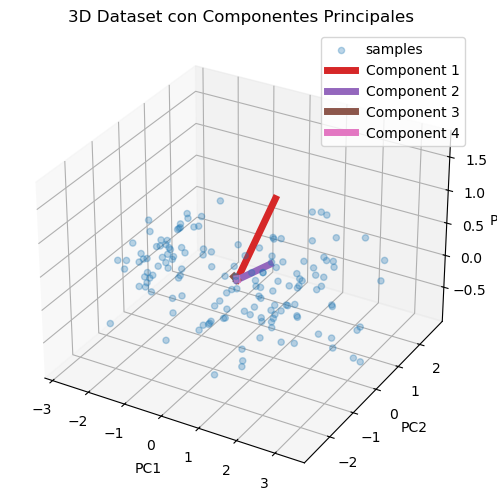

In [135]:
from sklearn.preprocessing import StandardScaler

scalerr = StandardScaler() # normalizar datos 
Y_scaled = scalerr.fit_transform(Y)

pcaa = PCA(n_components=3)
Y_pca = pca.fit_transform(Y_scaled)


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    ax.plot(
        [0, comp[0]],
        [0, comp[1]],
        [0, comp[2]],
        label=f"Component {i+1}",
        linewidth=5,
        color=f"C{i + 3}",
    )
ax.set_title("3D Dataset con Componentes Principales")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend()

In [137]:
# Segunda Parte

In [138]:
path = r'C:\Users\marca\OneDrive\Documentos\6 semestre neuro\Neurociencias-2025-2\S03_datasets\Brain_tumor\Brain Tumor.csv'
df=pd.read_csv(path)
df

Image  Class       Mean     Variance  Standard Deviation   Entropy  \
0        Image1      0   6.535339   619.587845           24.891522  0.109059   
1        Image2      0   8.749969   805.957634           28.389393  0.266538   
2        Image3      1   7.341095  1143.808219           33.820234  0.001467   
3        Image4      1   5.958145   959.711985           30.979219  0.001477   
4        Image5      0   7.315231   729.540579           27.010009  0.146761   
...         ...    ...        ...          ...                 ...       ...   
3757  Image3758      0  21.234512  1208.850174           34.768523  0.063774   
3758  Image3759      0  20.435349  1227.151440           35.030721  0.066763   
3759  Image3760      0  18.011520  1151.582765           33.934978  0.068396   
3760  Image3761      0  13.330429   945.732779           30.752769  0.087872   
3761  Image3762      0   6.110138   480.884025           21.929068  0.118171   

      Skewness   Kurtosis    Contrast    Energy       ASM  Homogeneity  \
0     4.276477  18.900575   98.613971  0.293314  0.086033     0.530941   
1     3.718116  14.464618   63.858816  0.475051  0.225674     0.651352   
2     5.061750  26.479563   81.867206  0.031917  0.001019     0.268275   
3     5.677977  33.428845  151.229741  0.032024  0.001026     0.243851   
4     4.283221  19.079108  174.988756  0.343849  0.118232     0.501140   
...        ...        ...         ...       ...       ...          ...   
3757  2.082079   4.647310  158.437600  0.220666  0.048693     0.487131   
3758  2.144625   4.882034  161.158675  0.225931  0.051045     0.502712   
3759  2.308349   5.579498  167.130118  0.228930  0.052409     0.492269   
3760  2.732822   7.757570  223.812932  0.261527  0.068397     0.480064   
3761  4.110669  17.538826  239.251388  0.306224  0.093773     0.494333   

      Dissimilarity  Correlation     Coarseness  
0          4.473346     0.981939  7.458341e-155  
1          3.220072     0.988834  7.458341e-155  
2          5.981800     0.978014  7.458341e-155  
3          7.700919     0.964189  7.458341e-155  
4          6.834689     0.972789  7.458341e-155  
...             ...          ...            ...  
3757       5.211739     0.950972  7.458341e-155  
3758       5.083126     0.952749  7.458341e-155  
3759       5.103700     0.952181  7.458341e-155  
3760       6.439784     0.940898  7.458341e-155  
3761       6.787329     0.938731  7.458341e-155  

[3762 rows x 15 columns]

In [139]:
print(np.std(df['Coarseness']))

#La variable coareness es igual para todos los datos, y es casi cero, no es relevante

0.0


In [140]:
X = df.iloc[:, 2:-1]
X_std= (X - X.mean())/X.std()
cov_matrix = (X_std - X_std.mean(axis=0)).T.dot((X_std - X_std.mean(axis=0)))/(X_std.shape[0]-1)
cov_matrix

Mean  Variance  Standard Deviation   Entropy  \
Mean                1.000000  0.783027            0.790984 -0.099729   
Variance            0.783027  1.000000            0.975699 -0.344432   
Standard Deviation  0.790984  0.975699            1.000000 -0.345127   
Entropy            -0.099729 -0.344432           -0.345127  1.000000   
Skewness           -0.601593 -0.347399           -0.425428 -0.222222   
Kurtosis           -0.358163 -0.248312           -0.329798 -0.140125   
Contrast           -0.050974  0.135494            0.117981 -0.140769   
Energy             -0.014863 -0.335470           -0.331103  0.971260   
ASM                -0.109393 -0.341061           -0.342530  0.999213   
Homogeneity         0.095556 -0.290527           -0.288801  0.852019   
Dissimilarity      -0.113864  0.235487            0.224773 -0.502363   
Correlation         0.293693  0.288037            0.354161  0.122080   

                    Skewness  Kurtosis  Contrast    Energy       ASM  \
Mean               -0.601593 -0.358163 -0.050974 -0.014863 -0.109393   
Variance           -0.347399 -0.248312  0.135494 -0.335470 -0.341061   
Standard Deviation -0.425428 -0.329798  0.117981 -0.331103 -0.342530   
Entropy            -0.222222 -0.140125 -0.140769  0.971260  0.999213   
Skewness            1.000000  0.899713  0.349856 -0.295413 -0.209289   
Kurtosis            0.899713  1.000000  0.296664 -0.172454 -0.133741   
Contrast            0.349856  0.296664  1.000000 -0.130708 -0.139276   
Energy             -0.295413 -0.172454 -0.130708  1.000000  0.961628   
ASM                -0.209289 -0.133741 -0.139276  0.961628  1.000000   
Homogeneity        -0.470054 -0.307314 -0.270119  0.915988  0.837139   
Dissimilarity       0.511931  0.375939  0.761497 -0.545774 -0.491813   
Correlation        -0.570919 -0.589211 -0.427443  0.123680  0.121054   

                    Homogeneity  Dissimilarity  Correlation  
Mean                   0.095556      -0.113864     0.293693  
Variance              -0.290527       0.235487     0.288037  
Standard Deviation    -0.288801       0.224773     0.354161  
Entropy                0.852019      -0.502363     0.122080  
Skewness              -0.470054       0.511931    -0.570919  
Kurtosis              -0.307314       0.375939    -0.589211  
Contrast              -0.270119       0.761497    -0.427443  
Energy                 0.915988      -0.545774     0.123680  
ASM                    0.837139      -0.491813     0.121054  
Homogeneity            1.000000      -0.746675     0.198639  
Dissimilarity         -0.746675       1.000000    -0.393013  
Correlation            0.198639      -0.393013     1.000000

In [141]:
np.cov(X_std.T)

array([[ 1.        ,  0.78302707,  0.79098428, -0.09972894, -0.60159344,
        -0.3581634 , -0.05097359, -0.0148629 , -0.10939257,  0.09555571,
        -0.11386413,  0.29369258],
       [ 0.78302707,  1.        ,  0.97569853, -0.3444318 , -0.34739893,
        -0.24831178,  0.1354942 , -0.33546967, -0.34106084, -0.29052673,
         0.23548733,  0.28803722],
       [ 0.79098428,  0.97569853,  1.        , -0.34512702, -0.42542807,
        -0.32979784,  0.11798145, -0.33110268, -0.34252995, -0.28880149,
         0.22477329,  0.35416082],
       [-0.09972894, -0.3444318 , -0.34512702,  1.        , -0.22222237,
        -0.14012485, -0.14076918,  0.97126042,  0.99921258,  0.85201917,
        -0.50236314,  0.12208018],
       [-0.60159344, -0.34739893, -0.42542807, -0.22222237,  1.        ,
         0.89971337,  0.34985617, -0.29541263, -0.20928868, -0.47005367,
         0.51193127, -0.57091928],
       [-0.3581634 , -0.24831178, -0.32979784, -0.14012485,  0.89971337,
         1.        ,  

In [142]:
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print(eig_vals)
print(eig_vectors)

eigen_pairs = [(np.abs(eig_vals[i]), eig_vectors[:,i]) for i in range(len(eig_vals))]
eigen_pairs.sort(reverse=True)

#Determinar el porcentaje de aporte de cada vector propio

total_sum = sum(eig_vals)
var_exp = [(i/total_sum)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
var_exp

[4.90580127e+00 3.75589772e+00 1.54491165e+00 7.51781548e-01
 5.74136703e-01 2.40065025e-01 1.29191528e-01 4.01132334e-02
 3.06366755e-02 6.44700117e-05 1.07013717e-02 1.66988010e-02]
[[ 1.36943174e-03  4.29053945e-01  2.54168149e-01 -3.80815552e-01
   2.39604973e-01  2.66155771e-01 -5.89278264e-01  3.36859675e-01
  -9.60416311e-02 -5.54591452e-03 -8.90601712e-02  1.13880660e-02]
 [-1.60192825e-01  4.20574153e-01  2.74990715e-01 -2.25068392e-01
  -1.62014901e-01 -2.14102548e-01  4.04552866e-01  6.15755860e-03
  -3.33629783e-01  6.81121505e-03  4.46201243e-01  3.53467858e-01]
 [-1.49575575e-01  4.44042821e-01  2.46728233e-01 -1.28698555e-01
  -1.61386185e-01 -1.99132152e-01  2.50215051e-01 -2.05643795e-01
   3.07294499e-01 -7.55869290e-03 -4.62750284e-01 -4.73068766e-01]
 [ 4.02581652e-01 -1.09882624e-01  2.78138676e-01 -4.32420047e-03
  -1.89074137e-01 -2.64303269e-01 -7.02753849e-02  1.55125392e-01
   1.50153800e-01 -7.52467419e-01 -5.37319585e-02  1.49082967e-01]
 [-2.26439002e-01 -4

[40.881677286884184,
 31.29914768988674,
 12.874263734077603,
 6.264846232358128,
 4.784472525710013,
 2.0005418709701575,
 1.076596063587527,
 0.33427694535051605,
 0.255305628808429,
 0.13915667474024113,
 0.08917809752887662,
 0.000537250097592616]

[ 40.88167729  72.18082498  85.05508871  91.31993494  96.10440747
  98.10494934  99.1815454   99.51582235  99.77112798  99.91028465
  99.99946275 100.        ]


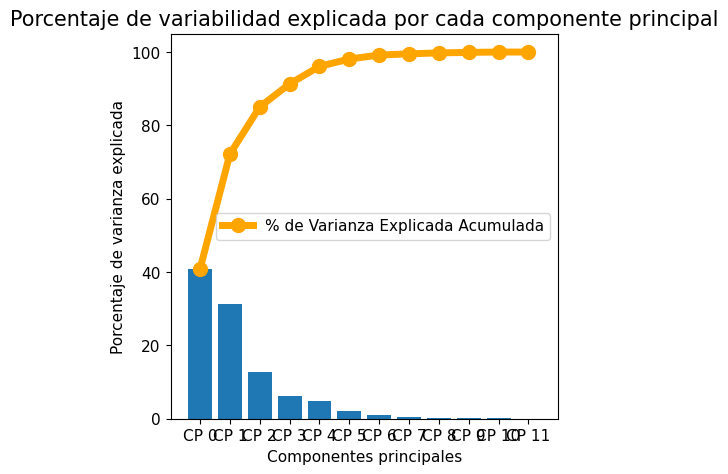

In [143]:
#Determinar cuántos componentes principales son necesarios para obtener al menos un 90% de datos (91.3%)

print(cum_var_exp)

plt.figure(figsize=(5, 5))

x=["CP %s"%i for i in range(len(var_exp))]

plt.bar(x, var_exp)
plt.plot(x, cum_var_exp, '.-', label="% de Varianza Explicada Acumulada", c='orange', linewidth=5, markersize=20)

plt.xlabel("Componentes principales", fontsize=11)
plt.ylabel("Porcentaje de varianza explicada", fontsize=11)
plt.title("Porcentaje de variabilidad explicada por cada componente principal", fontsize=15)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.legend(loc='best', fontsize=11)

# Los cuatro primeros valores son suficientes para explicar más del 90% de los datos

In [144]:
#Realizar la proyección de la data original al espacio reducido mediante 2 métodos y comparar resultados

T_matrix = np.stack([eigen_pairs[i][1] for i in range(4)], axis=1)

espacio_proyectado = []

for idx in range(len(X_std)):
    vec = X_std.iloc[idx, :]  # vector en R4
    Tvec = T_matrix.T.dot(vec)  
    espacio_proyectado.append(Tvec)

espacio_proyectado_np = np.array(espacio_proyectado)

df_proyectado = pd.DataFrame({
    'CP1': espacio_proyectado_np[:, 0], 
    'CP2': espacio_proyectado_np[:, 1], 
    'CP3': espacio_proyectado_np[:, 2],
    'CP4': espacio_proyectado_np[:, 3]
})

df_proyectado

CP1       CP2       CP3       CP4
0     1.134797 -0.116524 -0.122058  0.306232
1     4.261577  0.049431  1.500506 -0.313020
2    -2.481053  1.111298 -0.957706  0.117923
3    -3.073676  0.235228 -0.388695  0.686977
4     0.900807 -0.311233  1.345175  0.830150
...        ...       ...       ...       ...
3757 -0.320959  2.161024  1.250234 -0.578980
3758 -0.205878  2.131286  1.261093 -0.556558
3759 -0.203571  1.775428  1.132907 -0.338944
3760 -0.273109  0.654947  1.593092  0.421258
3761  0.308918 -1.213108  1.325185  1.094334

[3762 rows x 4 columns]

C:\Users\marca\AppData\Local\Temp\ipykernel_12824\2616403277.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", len(classes))  # Colormap con tantos colores como clases


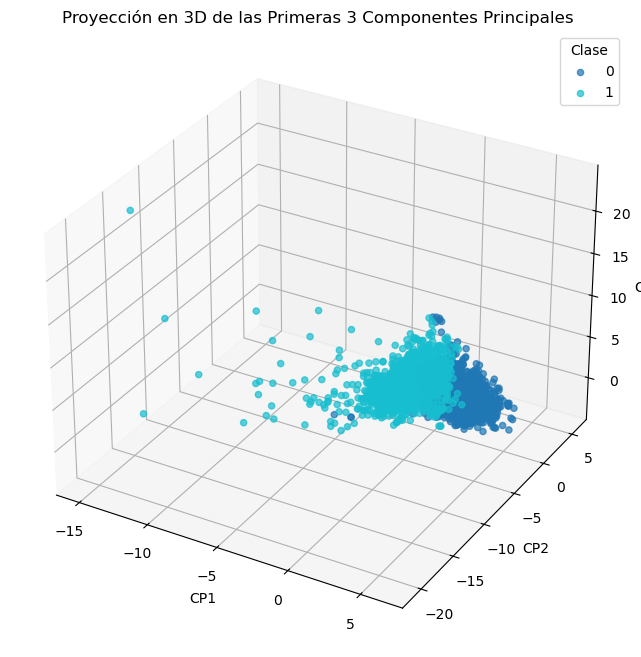

In [145]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Visualización en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Obtener las clases únicas de la columna 'Class'
classes = df['Class'].unique()

# Usar un colormap con suficientes colores
colors = plt.cm.get_cmap("tab10", len(classes))  # Colormap con tantos colores como clases

# Graficar los puntos 3D por clase
for i, class_name in enumerate(classes):
    # Seleccionar los datos correspondientes a cada clase
    class_data = df_proyectado[df['Class'] == class_name]
    # Graficar los puntos correspondientes a la clase
    ax.scatter(class_data['CP1'], 
               class_data['CP2'], 
               class_data['CP3'], 
               label=class_name, 
               color=colors(i), 
               alpha=0.7)

# Títulos y etiquetas
ax.set_title('Proyección en 3D de las Primeras 3 Componentes Principales')
ax.set_xlabel('CP1')
ax.set_ylabel('CP2')
ax.set_zlabel('CP3')

# Mostrar leyenda
ax.legend(title='Clase')

# Mostrar el gráfico
plt.show()


C:\Users\marca\AppData\Local\Temp\ipykernel_12824\948209198.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", len(classes))  # Colormap con suficientes colores


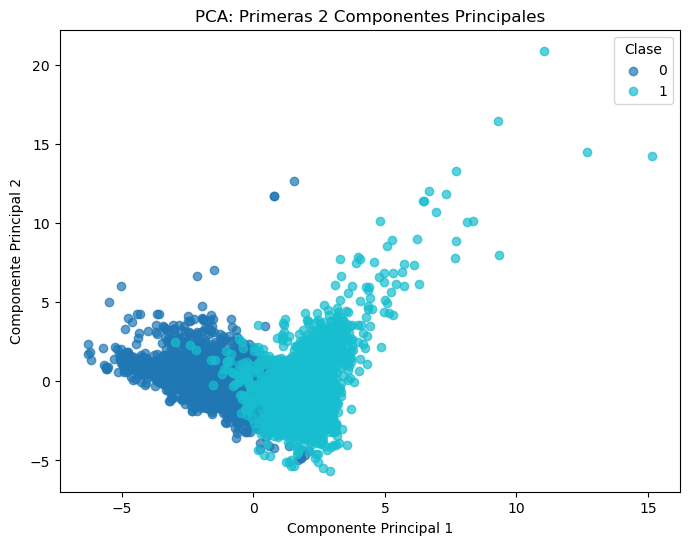

In [146]:
#Realizar la proyección de la data original al espacio reducido mediante 2 métodos y comparar resultados

from sklearn.decomposition import PCA

# Realizar PCA con 4 componentes principales
pca = PCA(n_components=4)
data_proyectada = pca.fit_transform(X_std)  # X_std es el conjunto de datos estándar

# Crear la figura
plt.figure(figsize=(8, 6))

# Colores basados en la columna 'Class'
# Supongamos que 'Class' es una columna en tu DataFrame df
# Puedes mapear las clases a colores únicos
classes = df['Class'].unique()  # Obtener las clases únicas
colors = plt.cm.get_cmap("tab10", len(classes))  # Colormap con suficientes colores

# Graficar las primeras dos componentes principales, cambiando el color según 'Class'
for i, class_name in enumerate(classes):
    # Seleccionar los datos correspondientes a cada clase
    class_data = data_proyectada[df['Class'] == class_name]
    # Graficar los puntos correspondientes a la clase
    plt.scatter(class_data[:, 0], class_data[:, 1], 
                label=class_name, 
                color=colors(i), 
                alpha=0.7)

# Etiquetas de los ejes
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA: Primeras 2 Componentes Principales")

# Mostrar leyenda y gráfico
plt.legend(title='Clase')
plt.show()


In [147]:
df_proyectado = pd.DataFrame(data_proyectada, columns=[f'CP{i+1}' for i in range(data_proyectada.shape[1])])

df_proyectado['Class']=df['Class']
df_proyectado

CP1       CP2       CP3       CP4  Class
0    -1.134797  0.116524 -0.122058 -0.306232      0
1    -4.261577 -0.049431  1.500506  0.313020      0
2     2.481053 -1.111298 -0.957706 -0.117923      1
3     3.073676 -0.235228 -0.388695 -0.686977      1
4    -0.900807  0.311233  1.345175 -0.830150      0
...        ...       ...       ...       ...    ...
3757  0.320959 -2.161024  1.250234  0.578980      0
3758  0.205878 -2.131286  1.261093  0.556558      0
3759  0.203571 -1.775428  1.132907  0.338944      0
3760  0.273109 -0.654947  1.593092 -0.421258      0
3761 -0.308918  1.213108  1.325185 -1.094334      0

[3762 rows x 5 columns]

C:\Users\marca\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marca\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marca\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marca\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

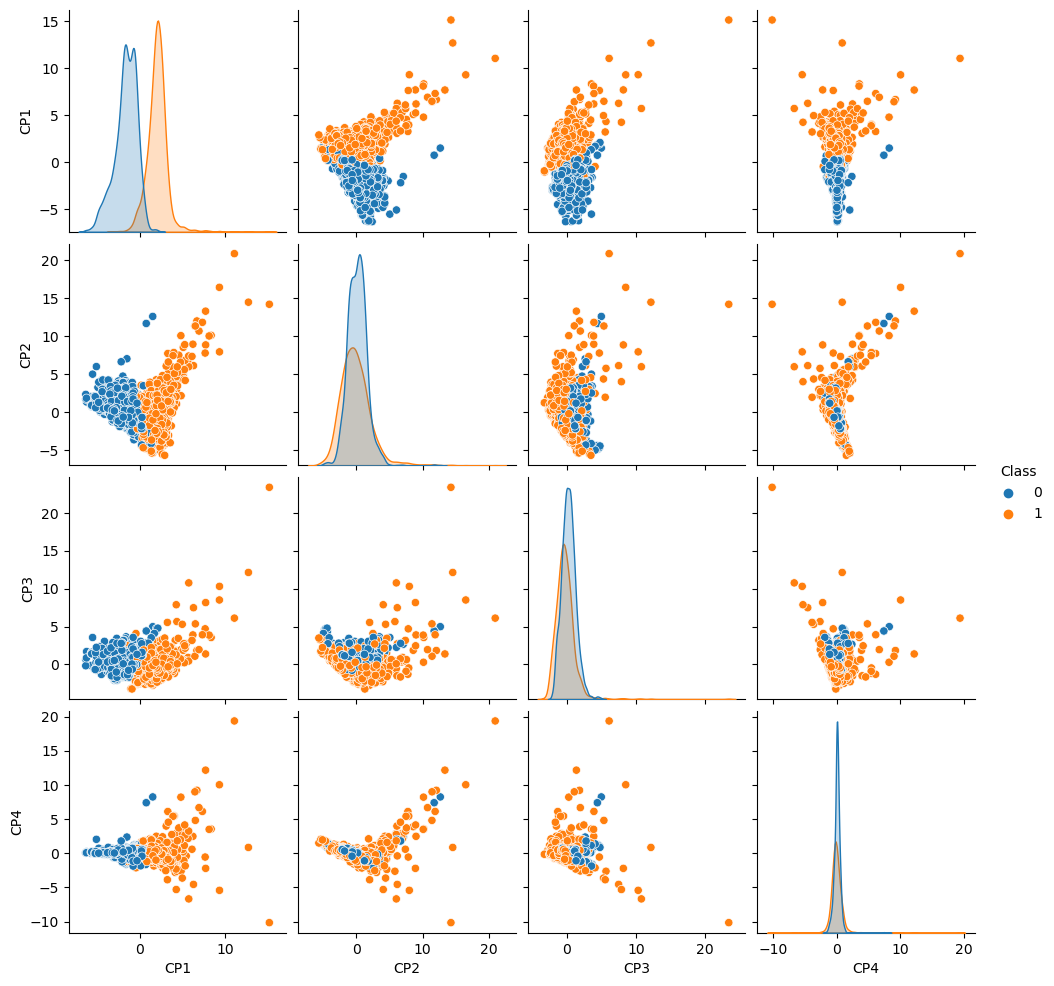

In [148]:
#Hacer la comparsión de los pairplot con la data original y la data proyectada

sns.pairplot(df_proyectado, hue='Class')

C:\Users\marca\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marca\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marca\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marca\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

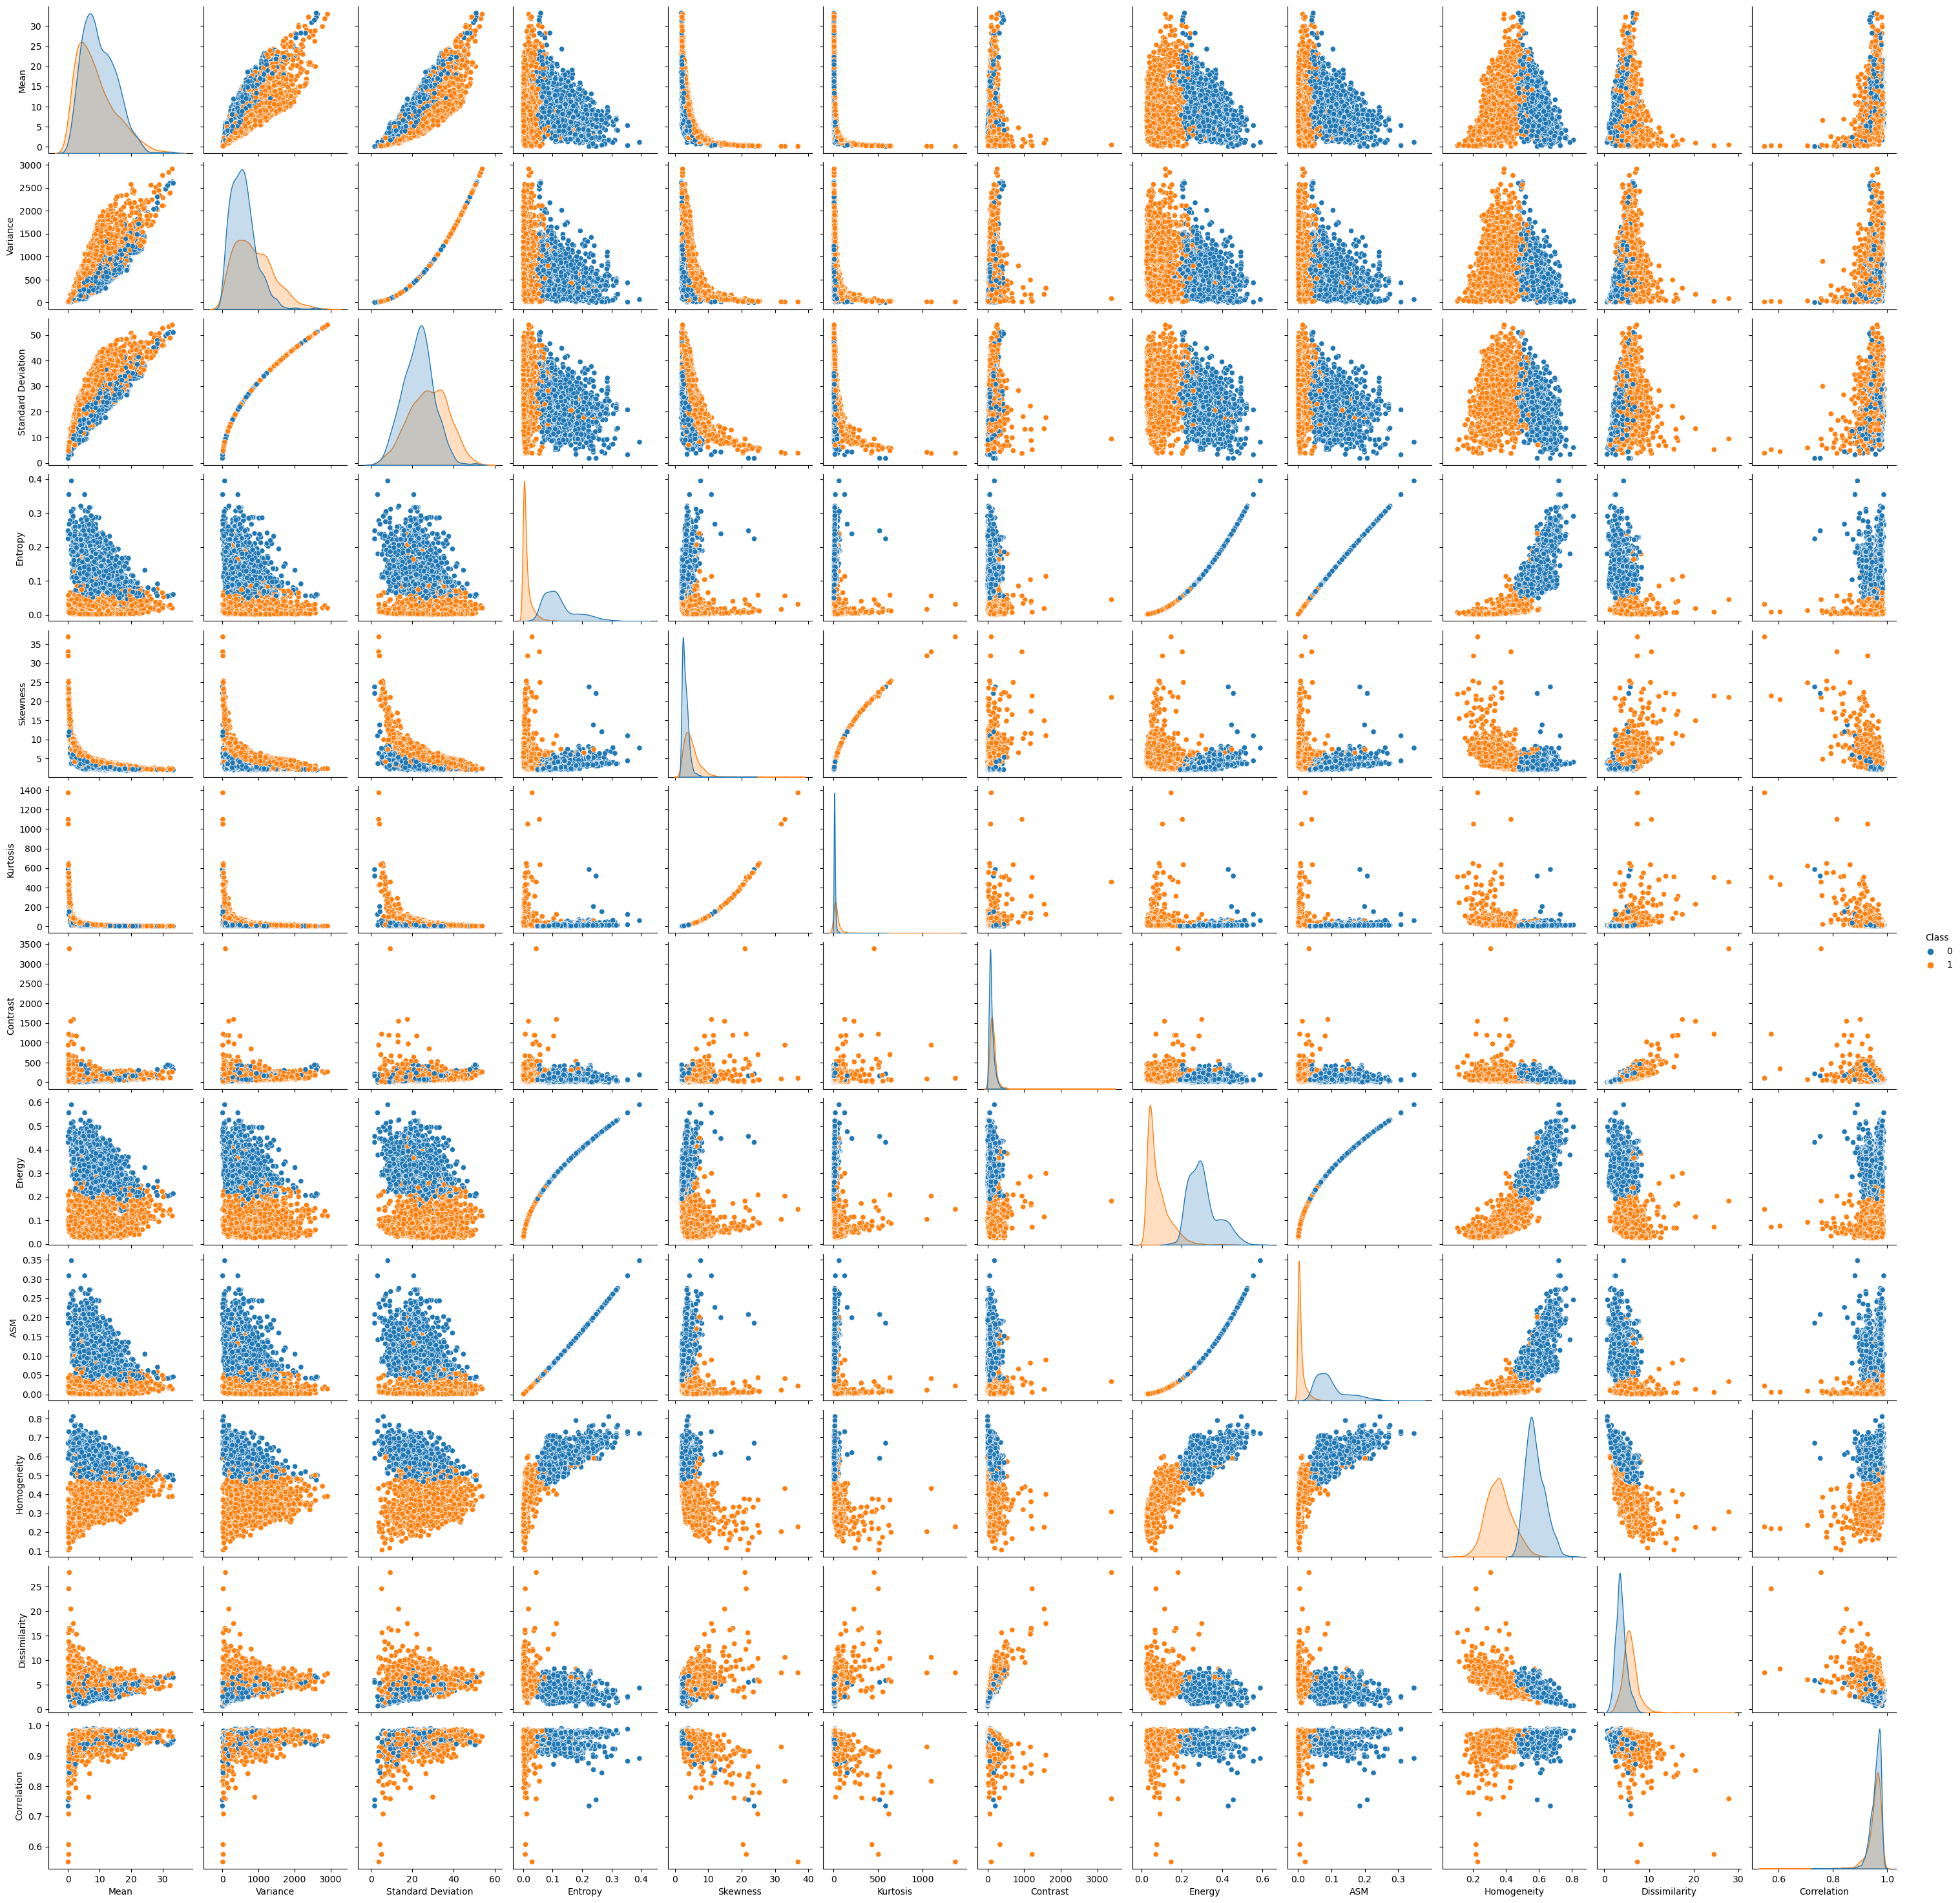

In [149]:
X['Class']=df['Class']
sns.pairplot(X, hue='Class')

In [150]:
# Podemos observar que los primeros componentes principales son los que mejor segmentan los datos del dataframe. 
# Caracterizan el comportamiento de los datos comparado con examinar la relación de cada pareja de variables del dataframe.
# La reducción de dimensionalidad jala jaja